In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, train_test_split
import pandas as pd

import utils.load_data as ld
import utils.features as f
import utils.classifiers as clfs
import utils.variables as v
import utils.metrics as m

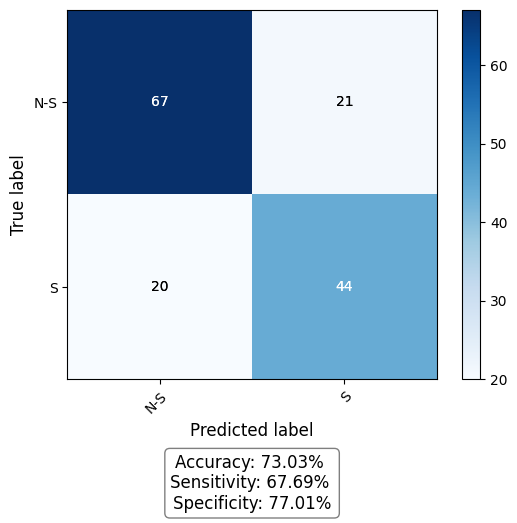

In [2]:
m.plot_conf_matrix_and_stats(conf_matrix=np.array([[67, 21],[20, 44]]))

In [2]:
def load_and_shape_data(data_type, label_type, feature, kfold, new_ica = False):
    #Load data
    if kfold:
        train_data, test_data, train_labels, test_labels = ld.load_kfold_data(data_type, label_type, epoched = False, binary = True)
    else:
        train_data, test_data, val_data, train_labels, test_labels, val_labels = ld.load_data(data_type, label_type, epoched = True, binary = True)


    if feature:
        #Reshape labels - ONLY FOR USING FEATURES
        train_labels = np.repeat(train_labels, repeats = 8, axis = 0).reshape((train_data.shape[0]*8,1))
        train_labels = train_labels.ravel()

        test_labels = np.repeat(test_labels,repeats = 8, axis = 0).reshape((test_data.shape[0]*8,1))
        test_labels = test_labels.ravel()

        print(train_labels.shape)
        print(test_labels.shape)

        #Extract features
        train_data = f.time_series_features(train_data, new_ica)
        test_data = f.time_series_features(test_data, new_ica)

        print(train_data.shape)
        print(test_data.shape)
    else:
        #Reshape data - ONLY FOR USING THE WHOLE DATASET, NOT FEATURES
        train_data = np.reshape(train_data, (train_data.shape[0]*train_data.shape[1], train_data.shape[2]))
        train_labels = np.repeat(train_labels, repeats = 8, axis = 1).reshape(-1,1)
        train_labels = train_labels.ravel()

        test_data = np.reshape(test_data, (test_data.shape[0]*test_data.shape[1],test_data.shape[2]))
        test_labels = np.repeat(test_labels, repeats = 8, axis = 1).reshape(-1,1)
        test_labels = test_labels.ravel()
    return train_data, test_data, train_labels, test_labels



In [3]:
data_type = 'raw'
label_type = 'stai'
feature = False
kfold = True
# time_series_features, fractal_features, entropy_features,freq_band_features, hjorth_features, kymatio_wave_scattering



train_data, test_data, train_labels, test_labels = load_and_shape_data(data_type, label_type, feature, kfold)

---- Generating all recordings ----
All records generated

---- Filtering out invalid recordings ----
ERROR 1) Failed to read data for recording P006_S002_001
ERROR 1) Failed to read data for recording P006_S002_002
ERROR 1) Failed to read data for recording P028_S002_001
ERROR 1) Failed to read data for recording P028_S002_002

---- Returning valid recordings ----
['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S001_001', 'P002_S001_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S001_001', 'P004_S001_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P005_S002_001', 'P005_S002_002', 'P006_S001_001', 'P006_S001_002', 'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S001_002', 'P008_S002_001', 'P008_S002_002', 'P009_S001_001', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 'P010_S001_002', 'P010_S002_001', 'P010_S002_002', 'P

raw data with stai labels
KNeighborsClassifier(leaf_size=1, n_neighbors=3)
Number of results: 72
accuracies: [0.66875    0.67708333 0.65208333 0.65416667 0.69375    0.69791667
 0.66041667 0.66041667 0.66875    0.67708333 0.65208333 0.65416667
 0.69375    0.69791667 0.66041667 0.66041667 0.66875    0.67708333
 0.65208333 0.65416667 0.69375    0.69791667 0.66041667 0.66041667
 0.66875    0.67708333 0.65208333 0.65416667 0.69375    0.69791667
 0.66041667 0.66041667 0.66875    0.67708333 0.65208333 0.65416667
 0.69375    0.69791667 0.66041667 0.66041667 0.66875    0.67708333
 0.65208333 0.65416667 0.69375    0.69791667 0.66041667 0.66041667
 0.66875    0.67708333 0.65208333 0.65416667 0.69375    0.69791667
 0.66041667 0.66041667 0.66875    0.67708333 0.65208333 0.65416667
 0.69375    0.69791667 0.66041667 0.66041667 0.66875    0.67708333
 0.65208333 0.65416667 0.69375    0.69791667 0.66041667 0.66041667]


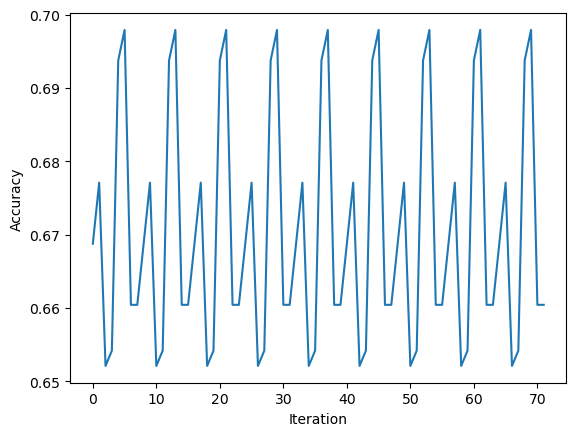

KNN:
Confusion matrix:
[[67 21]
 [20 44]]
Accuracy, Sensitivity, Specificity:
[73.03 77.01 67.69]


In [4]:
print(f'{data_type} data with {label_type} labels')
clfs.knn_classification(train_data, test_data, train_labels, test_labels)

In [ ]:
m.plot_conf_matrix(conf_matrix=np.array([[67, 21],[20, 44]]))

NameError: name 'plt' is not defined

raw data with stai labels
SVC(C=100)
Number of results: 10
accuracies: [0.6        0.6        0.74583333 0.74375    0.74791667 0.76666667
 0.76458333 0.74375    0.71458333 0.6875    ]


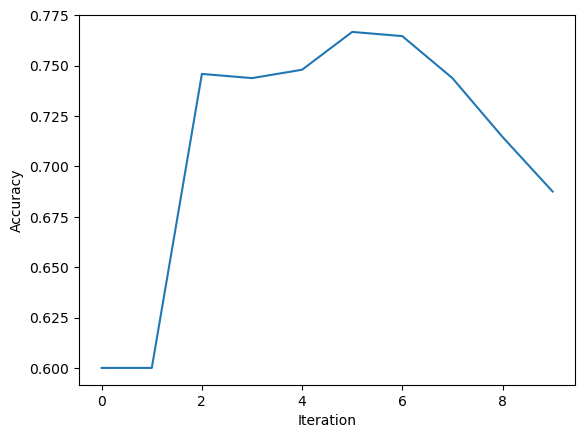

SVM:
Confusion matrix:
[[81  7]
 [12 52]]
Accuracy, Sensitivity, Specificity:
[87.5  87.1  88.14]


In [5]:
print(f'{data_type} data with {label_type} labels')
clfs.svm_classification(train_data, test_data, train_labels, test_labels)


In [6]:
data_type = 'init'

train_data, test_data, train_labels, test_labels = load_and_shape_data(data_type, label_type, feature, kfold)

---- Generating all recordings ----
All records generated

---- Filtering out invalid recordings ----
ERROR 1) Failed to read data for recording P006_S002_001
ERROR 1) Failed to read data for recording P006_S002_002
ERROR 1) Failed to read data for recording P010_S001_001
ERROR 1) Failed to read data for recording P013_S001_001
ERROR 1) Failed to read data for recording P013_S001_002
ERROR 1) Failed to read data for recording P020_S001_001
ERROR 1) Failed to read data for recording P023_S002_002
ERROR 1) Failed to read data for recording P028_S001_001
ERROR 1) Failed to read data for recording P028_S001_002

---- Returning valid recordings ----
['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S001_001', 'P002_S001_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S001_001', 'P004_S001_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P005_S002_001', 'P005_S002_002', 'P006_

init data with stai labels
KNeighborsClassifier(leaf_size=1, n_neighbors=2, p=1)
Number of results: 72
accuracies: [0.60833333 0.575      0.68333333 0.67291667 0.66041667 0.65833333
 0.65208333 0.66458333 0.60833333 0.575      0.68333333 0.67291667
 0.66041667 0.65833333 0.65208333 0.66458333 0.60833333 0.575
 0.68333333 0.67291667 0.66041667 0.65833333 0.65208333 0.66458333
 0.60833333 0.575      0.68333333 0.67291667 0.66041667 0.65833333
 0.65208333 0.66458333 0.60833333 0.575      0.68333333 0.67291667
 0.66041667 0.65833333 0.65208333 0.66458333 0.60833333 0.575
 0.68333333 0.67291667 0.66041667 0.65833333 0.65208333 0.66458333
 0.60833333 0.575      0.68333333 0.67291667 0.66041667 0.65833333
 0.65208333 0.66458333 0.60833333 0.575      0.68333333 0.67291667
 0.66041667 0.65833333 0.65208333 0.66458333 0.60833333 0.575
 0.68333333 0.67291667 0.66041667 0.65833333 0.65208333 0.66458333]


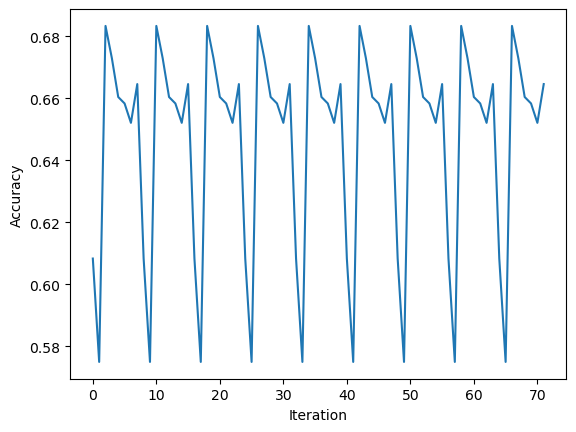

KNN:
Confusion matrix:
[[85  3]
 [63  1]]
Accuracy, Sensitivity, Specificity:
[56.58 57.43 25.  ]


In [7]:
print(f'{data_type} data with {label_type} labels')
clfs.knn_classification(train_data, test_data, train_labels, test_labels)

init data with stai labels
SVC(C=10)
Number of results: 10
accuracies: [0.6        0.6        0.6        0.61458333 0.68958333 0.68958333
 0.68958333 0.68958333 0.68958333 0.68958333]


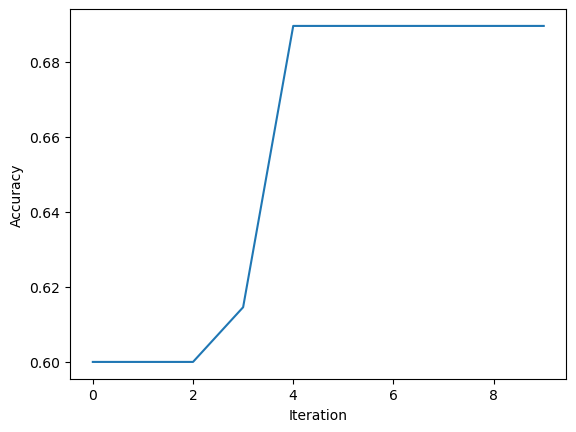

SVM:
Confusion matrix:
[[78 10]
 [54 10]]
Accuracy, Sensitivity, Specificity:
[57.89 59.09 50.  ]


In [8]:
print(f'{data_type} data with {label_type} labels')
clfs.svm_classification(train_data, test_data, train_labels, test_labels)

In [9]:
data_type = 'ica'

train_data, test_data, train_labels, test_labels = load_and_shape_data(data_type, label_type, feature, kfold)

---- Generating all recordings ----
All records generated

---- Filtering out invalid recordings ----
ERROR 1) Failed to read data for recording P006_S002_001
ERROR 1) Failed to read data for recording P006_S002_002
ERROR 1) Failed to read data for recording P028_S001_001
ERROR 1) Failed to read data for recording P028_S001_002

---- Returning valid recordings ----
['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S001_001', 'P002_S001_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S001_001', 'P004_S001_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P005_S002_001', 'P005_S002_002', 'P006_S001_001', 'P006_S001_002', 'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S001_002', 'P008_S002_001', 'P008_S002_002', 'P009_S001_001', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 'P010_S001_002', 'P010_S002_001', 'P010_S002_002', 'P

ica data with stai labels
KNeighborsClassifier(leaf_size=1, n_neighbors=3)
Number of results: 72
accuracies: [0.68125    0.6625     0.64375    0.63958333 0.65625    0.68541667
 0.64375    0.63958333 0.68125    0.6625     0.64375    0.63958333
 0.65625    0.68541667 0.64375    0.63958333 0.68125    0.6625
 0.64375    0.63958333 0.65625    0.68541667 0.64375    0.63958333
 0.68125    0.6625     0.64375    0.63958333 0.65625    0.68541667
 0.64375    0.63958333 0.68125    0.6625     0.64375    0.63958333
 0.65625    0.68541667 0.64375    0.63958333 0.68125    0.6625
 0.64375    0.63958333 0.65625    0.68541667 0.64375    0.63958333
 0.68125    0.6625     0.64375    0.63958333 0.65625    0.68541667
 0.64375    0.63958333 0.68125    0.6625     0.64375    0.63958333
 0.65625    0.68541667 0.64375    0.63958333 0.68125    0.6625
 0.64375    0.63958333 0.65625    0.68541667 0.64375    0.63958333]


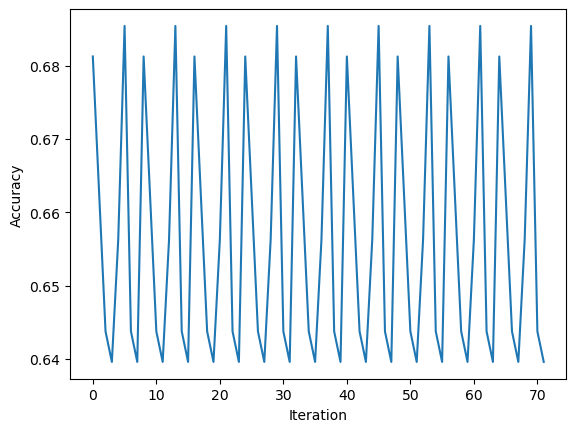

KNN:
Confusion matrix:
[[77 11]
 [61  3]]
Accuracy, Sensitivity, Specificity:
[52.63 55.8  21.43]


In [10]:
print(f'{data_type} data with {label_type} labels')
clfs.knn_classification(train_data, test_data, train_labels, test_labels)

ica data with stai labels
SVC(C=100)
Number of results: 10
accuracies: [0.6        0.6        0.6        0.66041667 0.70625    0.725
 0.71458333 0.71458333 0.71458333 0.71458333]


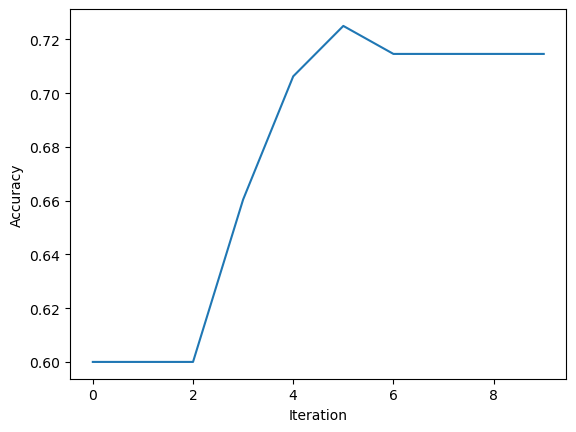

SVM:
Confusion matrix:
[[63 25]
 [49 15]]
Accuracy, Sensitivity, Specificity:
[51.32 56.25 37.5 ]


In [11]:
print(f'{data_type} data with {label_type} labels')
clfs.svm_classification(train_data, test_data, train_labels, test_labels)

In [12]:
data_type = 'new_ica'

train_data, test_data, train_labels, test_labels = load_and_shape_data(data_type, label_type, feature, kfold, new_ica = False)

---- Generating all recordings ----
All records generated

---- Filtering out invalid recordings ----
ERROR 1) Failed to read data for recording P006_S002_001
ERROR 1) Failed to read data for recording P006_S002_002
ERROR 1) Failed to read data for recording P010_S001_001
ERROR 1) Failed to read data for recording P013_S001_001
ERROR 1) Failed to read data for recording P013_S001_002
ERROR 1) Failed to read data for recording P020_S001_001
ERROR 1) Failed to read data for recording P023_S002_002
ERROR 1) Failed to read data for recording P028_S001_001
ERROR 1) Failed to read data for recording P028_S001_002

---- Returning valid recordings ----
['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S001_001', 'P002_S001_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S001_001', 'P004_S001_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P005_S002_001', 'P005_S002_002', 'P006_

new_ica data with stai labels
KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)
Number of results: 72
accuracies: [0.57291667 0.57291667 0.51875    0.51875    0.43333333 0.43333333
 0.52708333 0.52708333 0.57291667 0.57291667 0.51875    0.51875
 0.43333333 0.43333333 0.52708333 0.52708333 0.57291667 0.57291667
 0.51875    0.51875    0.43333333 0.43333333 0.52708333 0.52708333
 0.57291667 0.57291667 0.51875    0.51875    0.43333333 0.43333333
 0.52708333 0.52708333 0.57291667 0.57291667 0.51875    0.51875
 0.43333333 0.43333333 0.52708333 0.52708333 0.57291667 0.57291667
 0.51875    0.51875    0.43333333 0.43333333 0.52708333 0.52708333
 0.57291667 0.57291667 0.51875    0.51875    0.43333333 0.43333333
 0.52708333 0.52708333 0.57291667 0.57291667 0.51875    0.51875
 0.43333333 0.43333333 0.52708333 0.52708333 0.57291667 0.57291667
 0.51875    0.51875    0.43333333 0.43333333 0.52708333 0.52708333]


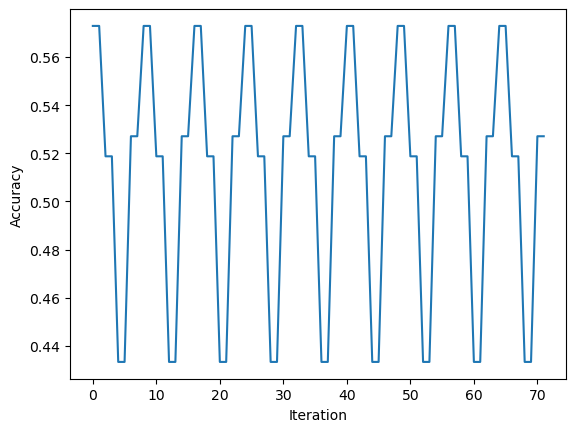

KNN:
Confusion matrix:
[[72 16]
 [56  8]]
Accuracy, Sensitivity, Specificity:
[52.63 56.25 33.33]


In [13]:
print(f'{data_type} data with {label_type} labels')
clfs.knn_classification(train_data, test_data, train_labels, test_labels)

new_ica data with stai labels
SVC(C=0.001)
Number of results: 10
accuracies: [0.6        0.6        0.6        0.6        0.6        0.59583333
 0.58541667 0.5375     0.54791667 0.54375   ]


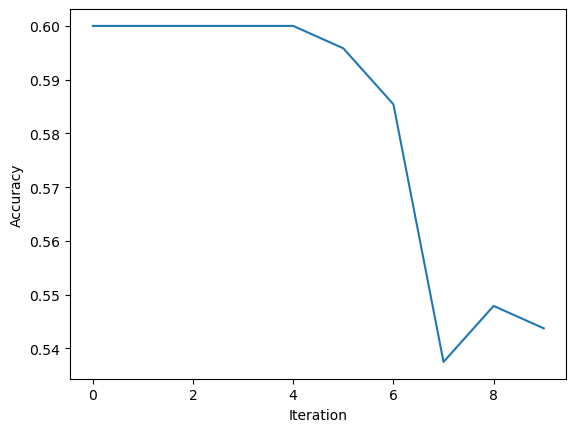

SVM:
Confusion matrix:
[[88  0]
 [64  0]]
Null error in specificity
Accuracy, Sensitivity, Specificity:
[57.89 57.89  0.  ]


In [14]:
print(f'{data_type} data with {label_type} labels')
clfs.svm_classification(train_data, test_data, train_labels, test_labels)